<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/Exerc%C3%ADcio_2_Aula_3_exercicio_pandas_avan%C3%A7ado_graficos_Wallison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Leia o arquivo CSV contendo os dados do IGM.


Sobre o conjunto de dados:

Lançado em 2016, o Índice de Governança Municipal (IGM-CFA) consiste em uma métrica da governança pública nos municípios brasileiros a partir de três dimensões: Finanças, Gestão e Desempenho.

Fonte: https://www.ipm.com.br/noticias/administracao-geral-noticias/indice-de-governanca-municipal-2021-clientes-ipm-sao-destaque-no-brasil/#:~:text=Lan%C3%A7ado%20em%202016%2C%20o%20%C3%8Dndice,%3A%20Finan%C3%A7as%2C%20Gest%C3%A3o%20e%20Desempenho.

In [89]:
import pandas as pd
#dados = pd.read_csv("employees.csv")
url='https://drive.google.com/uc?id=1IJPSBCA5PtirkTjw831LxtWSnsjXUpw5'
dados = pd.read_csv(url,sep=";")


In [83]:
dados.head()

,regiao,estado,municipio,codigo_mun,capital,porte,populacao,area,densidade_dem,pib,...,gasto_pc_educacao,exp_anos_estudo,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao,idhm,ranking_igm,indice_governanca
0,SUDESTE,SP,ILHABELA,3520400,0,Pequeno porte 2,"32782,0","347,52","94,33126151012893","3256711,64",...,"1734,52","10,63","482,0543478260869","541,226086956522","530,6511111111108","507,952777777778","499,3611111111112","0,747",1º,"0,767"
1,SUDESTE,SP,SANTANA DE PARNAIBA,3547304,0,Grande porte,"129261,0","179,95","718,3161989441512","7373602,99",...,"1704,93","10,01","483,99762532981583","542,7604221635892","535,7651286601596","499,91109139307923","547,5066548358474","0,885",2º,"0,759"
2,SUL,SC,BOMBINHAS,4202453,0,Pequeno porte 1,"18052,0","35,92","502,5612472160356","377357,32",...,"1370,96","10,44","472,1056074766355","541,9495327102804","523,2519230769232","474,50673076923056","515,0","0,807",3º,"0,758"
3,SUDESTE,SP,SAO BERNARDO DO CAMPO,3548708,0,Grande porte,"822242,0","409,53","2007,7698825482871","47668531,31",...,"770,79","10,22","489,2415144372419","552,6161903358857","546,1737209994044","514,2043575252835","557,6680547293279","0,8640000000000001",4º,"0,7559999999999999"
4,CENTRO-OESTE,DF,BRASILIA,5300108,1,Grande porte,"2977216,0","5780,0","515,0892733564013","175362791,42",...,"2077,49","9,87","493,51475767340736","551,9824984539249","538,3666117554056","509,20600619399215","567,991532683184","0,909",5º,"0,736"


In [105]:
df = dados

# 2- Realize a conversão das colunas `area`, `pib` e `idhm` para o tipo `float`. Obtenha a média dos valores de cada coluna. Em seguida, realize uma nova importação dos dados, de forma a utilizar o caractere `,` como separador decimal.



In [84]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [113]:
dados = pd.read_csv(url,sep=";", decimal=",")

In [189]:
df.head()

,estado,municipio,idhm,classe
0,SP,ILHABELA,0.75,C
1,SP,SANTANA DE PARNAIBA,0.89,A
2,SC,BOMBINHAS,0.81,B
3,SP,SAO BERNARDO DO CAMPO,0.86,A
4,DF,BRASILIA,0.91,A


In [109]:
(df.
    assign(**{col: df[col]
        .str.replace(',','.')
        .astype(float) for col in [
            'area','pib','idhm'
        ]}
    ).agg('mean', numeric_only=True)
)

codigo_mun   3253590.77
capital            0.00
area            1526.53
pib           954480.06
idhm               0.52
dtype: float64

In [46]:
dados = pd.read_csv(url,sep=";")

# 3 - Crie um novo DataFrame com as colunas `estados`, `municipio` e `idhm`. Adicione neste novo dataframe uma coluna chamada `classe`, onde esta irá indicar a classe do município de acordo com o seu IDH. Deverão ser seguidas as regras abaixo:

*   Igual ou acima de 0,850: A;
*   Entre 0,750 (inclusive) e 0,850: B;
*   Entre 0,650 (inclusive) e 0,750: C;
*   Entre 0,550 (inclusive) e 0,650: D;
*   Entre 0,450 (inclusive) e 0,550: E;
*   Abaixo de 0,450: F.


In [114]:
df = dados[["estado", "municipio","idhm"]].copy()

In [115]:
df = (df.
    assign(
        classe = pd.cut(
            x=df['idhm'],
            bins=[0, 0.45, 0.55, 0.65, 0.75, 0.85, 1],
            labels=['F', 'E', 'D', 'C', 'B', 'A'],
            right=False
        )
    )
)

In [116]:
df.head()

,estado,municipio,idhm,classe
0,SP,ILHABELA,0.75,C
1,SP,SANTANA DE PARNAIBA,0.89,A
2,SC,BOMBINHAS,0.81,B
3,SP,SAO BERNARDO DO CAMPO,0.86,A
4,DF,BRASILIA,0.91,A


# 4 - Utilizando ainda o Dataframe criado na questão anterior, plote um gráfico exibindo a quantidade de municípios por cada classe.

In [117]:
import matplotlib.pyplot as plt

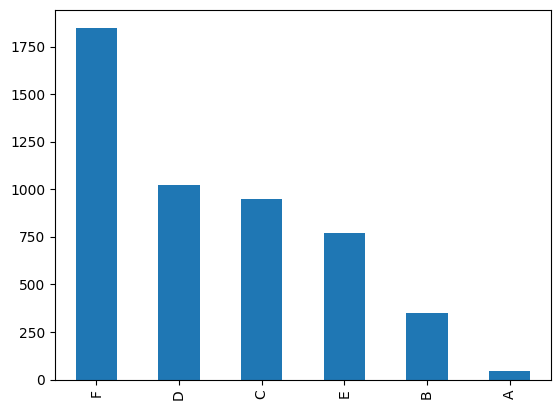

In [123]:
df.classe.value_counts().plot(kind='bar');

In [121]:
df.groupby('classe').count()["estado"]

classe
F    1851
E     773
D    1021
C     949
B     348
A      43
Name: estado, dtype: int64

# 5 - Utilizando ainda o Dataframe criado na questão 3, considerando os estados dos municípios de classe A, existe algum município de classe C pertencente a estes mesmos estados? Se sim, exiba.

In [125]:
estados_classe_a = df[df["classe"] == "A"]["estado"].value_counts().index
estados_classe_a

Index(['SP', 'SC', 'ES', 'RJ', 'MG', 'PR', 'DF', 'RS', 'GO'], dtype='object')

In [127]:
df[(df["classe"] == "C") & (df['estado'].isin(estados_classe_a))]

,estado,municipio,idhm,classe
0,SP,ILHABELA,0.75,C
15,GO,OUVIDOR,0.73,C
18,SC,CORDILHEIRA ALTA,0.73,C
20,RS,TUPANDI,0.66,C
22,GO,CHAPADAO DO CEU,0.71,C
...,...,...,...,...
5496,SP,CASA BRANCA,0.69,C
5498,SP,EMBU-GUACU,0.73,C
5500,SP,FERRAZ DE VASCONCELOS,0.70,C
5502,SP,SAO BENTO DO SAPUCAI,0.66,C


# 6 - Qual a média da coluna `idhm` para cada estado?

In [129]:
df.groupby("estado")["idhm"].mean().reset_index()

,estado,idhm
0,AC,0.34
1,AL,0.29
2,AM,0.30
3,AP,0.48
4,BA,0.36
5,CE,0.41
6,DF,0.91
7,ES,0.60
8,GO,0.60
9,MA,0.33


# 7 - Plote um gráfico do tipo box plot, descrevendo assim a distribuição do valor da coluna `idhm` por região.

In [132]:
dados.columns

Index(['regiao', 'estado', 'municipio', 'codigo_mun', 'capital', 'porte',
       'populacao', 'area', 'densidade_dem', 'pib', 'pib_pc',
       'participacao_transf_receita', 'servidores', 'comissionados',
       'comissionados_por_servidor', 'perc_pop_econ_ativa',
       'taxa_empreendedorismo', 'anos_estudo_empreendedor', 'jornada_trabalho',
       'gasto_pc_saude', 'hab_p_medico', 'exp_vida', 'gasto_pc_educacao',
       'exp_anos_estudo', 'nota_ciencias', 'nota_humanas', 'nota_linguagem',
       'nota_mat', 'nota_redacao', 'idhm', 'ranking_igm', 'indice_governanca'],
      dtype='object')

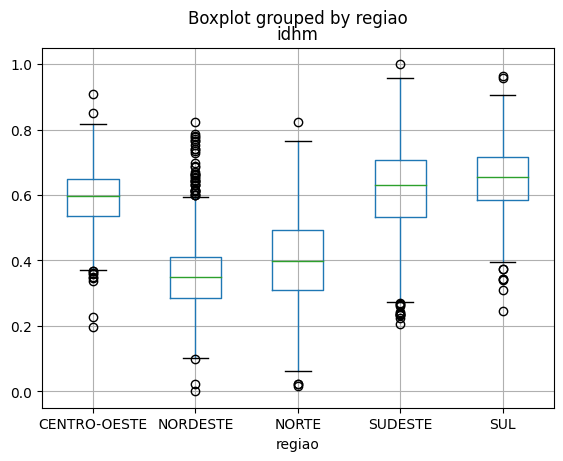

In [134]:
dados.boxplot(column="idhm", by="regiao")
plt.show()

# 8 - Existem municípios de médio porte que também são capitais? Se sim, liste-os. Além disso, liste os 10 municípios de médio porte mais populosos, gerando também uma visualização de pizza utilizando a população.

In [135]:
set(dados.porte)

{'Grande porte', 'Médio porte', 'Pequeno porte 1', 'Pequeno porte 2'}

In [138]:
dados[(dados["porte"] == "Médio porte") & dados['capital'] == 1]

,regiao,estado,municipio,codigo_mun,capital,porte,populacao,area,densidade_dem,pib,...,gasto_pc_educacao,exp_anos_estudo,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao,idhm,ranking_igm,indice_governanca


Conforme observado acima, não existem municípios de médio porte que são capitais.

In [143]:
df_municipios = dados[(dados["porte"] == "Médio porte")]
df_municipios = df_municipios.sort_values(by="populacao", ascending=False)
df_municipios = df_municipios[:10]
df_municipios.head()

,regiao,estado,municipio,codigo_mun,capital,porte,populacao,area,densidade_dem,pib,...,gasto_pc_educacao,exp_anos_estudo,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao,idhm,ranking_igm,indice_governanca
749,NORDESTE,RN,SAO GONCALO DO AMARANTE,2412005,0,Médio porte,99724.00,249.12,400.31,1103653.95,...,572.32,9.18,480.63,528.88,518.60,487.07,541.27,0.52,750º,0.57
3316,SUDESTE,RJ,ITAPERUNA,3302205,0,Médio porte,99504.00,1105.34,90.02,1903813.07,...,512.46,9.14,497.54,551.05,534.37,513.56,581.74,0.69,NaN,NaN
699,SUL,RS,GUAIBA,4309308,0,Médio porte,99186.00,376.95,263.13,4174309.34,...,567.01,10.02,467.88,536.47,524.98,482.65,521.32,0.69,700º,0.57
4877,NORTE,PA,BREVES,1501808,0,Médio porte,99080.00,9563.01,10.36,557496.48,...,NaN,6.54,446.76,505.23,486.24,444.97,499.02,0.14,NaN,NaN
2599,NORDESTE,PE,ABREU E LIMA,2600054,0,Médio porte,98990.00,126.19,784.45,1299975.88,...,289.99,10.01,456.48,512.27,504.79,449.47,497.99,0.56,2600º,0.43


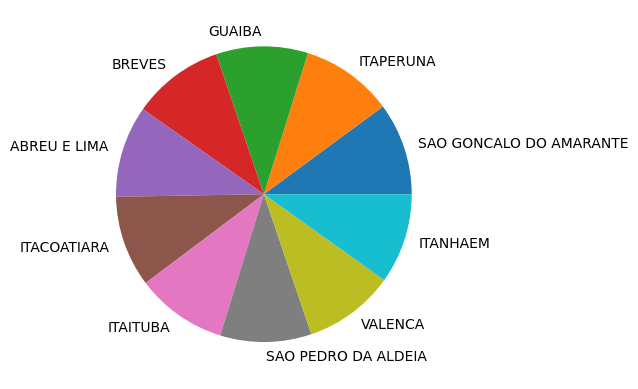

In [156]:
df_municipios.plot(
    kind="pie", 
    y="populacao", 
    labels=df_municipios["municipio"],
    ylabel="",
    legend=False
)
plt.show()

# 9 - Crie um agrupamento dos dados por estado da nota média do ENEM. Plote um gráfico de barras horizontais de forma a facilitar a comparação das notas dentre os estados.

OBS: para calcular a média das notas do ENEM por cada registro, basta aplicar a seguinte fórmula:

```python
media = (nota_ciencias + nota_humanas + nota_linguagem + nota_mat + nota_redacao) / 5
```

In [158]:
def get_media_enem(row):
    return ((row["nota_ciencias"] + row["nota_humanas"] + row["nota_linguagem"] + row["nota_mat"] + row["nota_redacao"]) / 5)

dados_media = dados[["estado","nota_ciencias","nota_humanas","nota_linguagem","nota_mat","nota_redacao"]]
dados_media

,estado,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao
0,SP,482.05,541.23,530.65,507.95,499.36
1,SP,484.00,542.76,535.77,499.91,547.51
2,SC,472.11,541.95,523.25,474.51,515.00
3,SP,489.24,552.62,546.17,514.20,557.67
4,DF,493.51,551.98,538.37,509.21,567.99
...,...,...,...,...,...,...
5565,TO,450.61,457.10,473.13,458.92,494.29
5566,TO,437.36,470.19,463.17,442.09,444.20
5567,TO,431.23,456.08,453.89,426.58,399.02
5568,TO,443.88,480.92,465.54,437.48,441.15


In [159]:
col = dados_media.apply(get_media_enem, axis=1)

In [160]:
dados_media["media_enem"] = col

<ipython-input-160-6cf4ebcd7aea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_media["media_enem"] = col


In [161]:
dados_media

,estado,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao,media_enem
0,SP,482.05,541.23,530.65,507.95,499.36,512.25
1,SP,484.00,542.76,535.77,499.91,547.51,521.99
2,SC,472.11,541.95,523.25,474.51,515.00,505.36
3,SP,489.24,552.62,546.17,514.20,557.67,531.98
4,DF,493.51,551.98,538.37,509.21,567.99,532.21
...,...,...,...,...,...,...,...
5565,TO,450.61,457.10,473.13,458.92,494.29,466.81
5566,TO,437.36,470.19,463.17,442.09,444.20,451.40
5567,TO,431.23,456.08,453.89,426.58,399.02,433.36
5568,TO,443.88,480.92,465.54,437.48,441.15,453.79


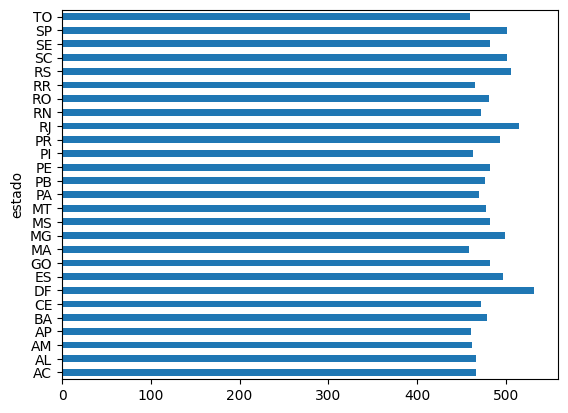

In [162]:
dados_media.groupby("estado")["media_enem"].mean().plot(kind="barh", x="media_enem")
plt.show()

# 10 - Realize uma análise de correlação entre as variáveis numéricas presentes no conjunto de dados. Foque, principalmente, no  índice de governança (indice_governanca). Obtenha a média do índice por estado e plote um gráfico exibindo a dispersão dos valores, juntamente com a reta de regressão.

Quais conclusões você pode tomar?

In [168]:
matriz_corr = dados.corr(method='pearson')
matriz_corr["indice_governanca"]

<ipython-input-168-a11fcdecfa25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = dados.corr(method='pearson')


codigo_mun                     0.59
capital                        0.13
populacao                      0.15
area                          -0.08
densidade_dem                  0.18
pib                            0.15
pib_pc                         0.61
participacao_transf_receita   -0.65
servidores                     0.16
comissionados                  0.14
comissionados_por_servidor     0.05
perc_pop_econ_ativa            0.70
taxa_empreendedorismo          0.13
anos_estudo_empreendedor       0.65
jornada_trabalho               0.48
gasto_pc_saude                 0.54
hab_p_medico                  -0.04
exp_vida                       0.72
gasto_pc_educacao              0.13
exp_anos_estudo                0.51
nota_ciencias                  0.48
nota_humanas                   0.54
nota_linguagem                 0.58
nota_mat                       0.57
nota_redacao                   0.41
idhm                           0.82
indice_governanca              1.00
Name: indice_governanca, dty

In [169]:
# matriz_corr = dados.corr(method='kendall')
# matriz_corr["indice_governanca"]

In [170]:
# matriz_corr = dados.corr(method='spearman')
# matriz_corr["indice_governanca"]

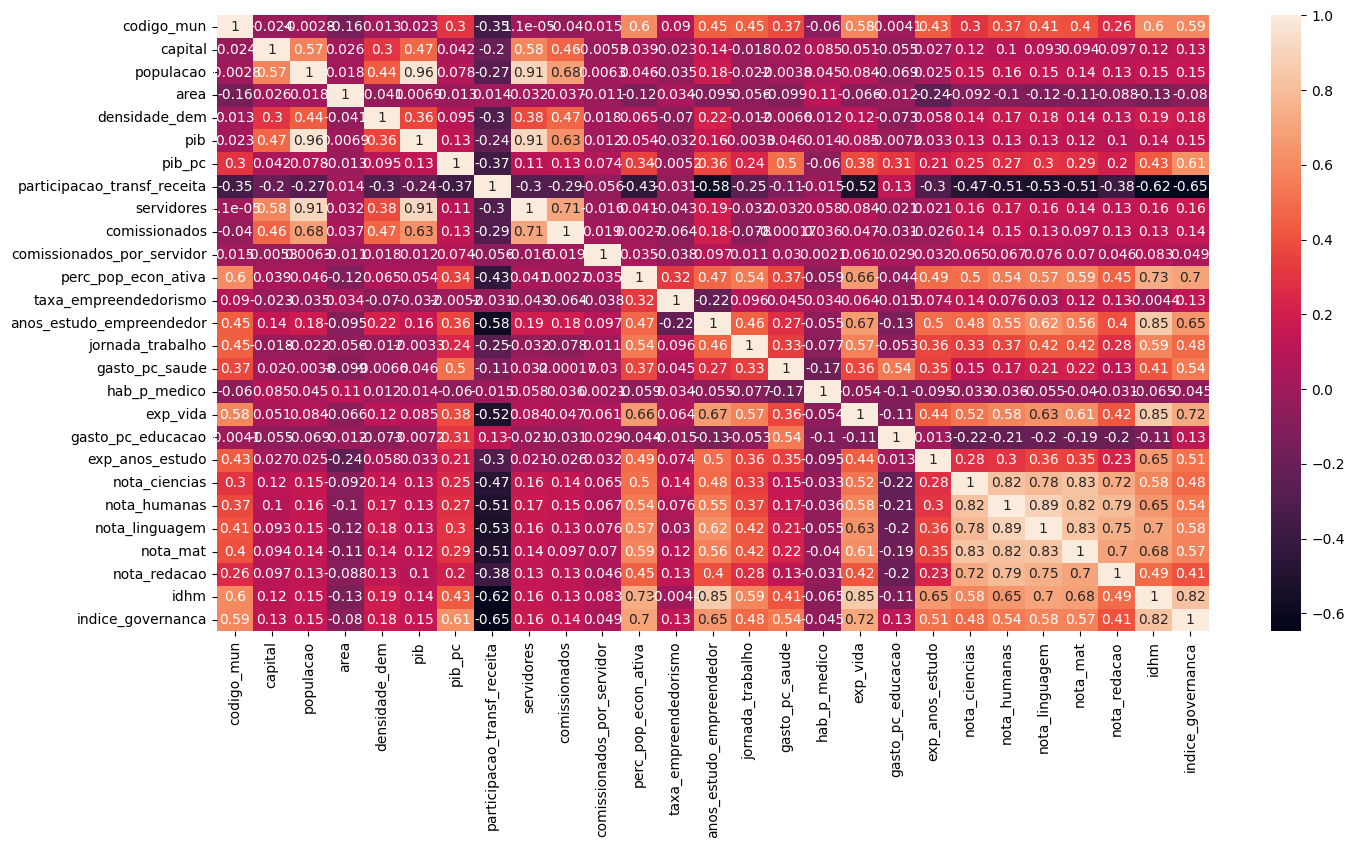

In [171]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(matriz_corr, annot=True)
plt.show()

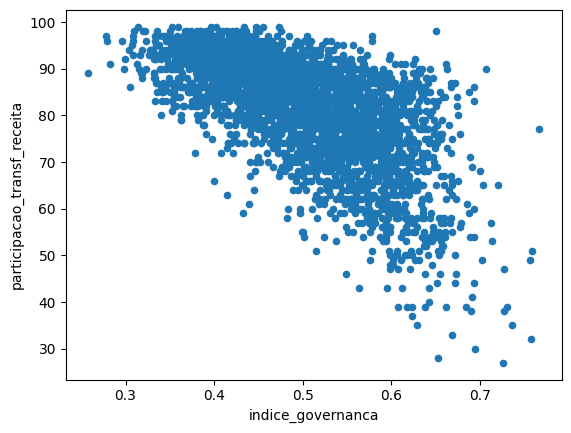

In [172]:
dados.plot(kind="scatter", x="indice_governanca", y="participacao_transf_receita")
plt.show()

In [179]:
df_sample = dados.sample(20000)

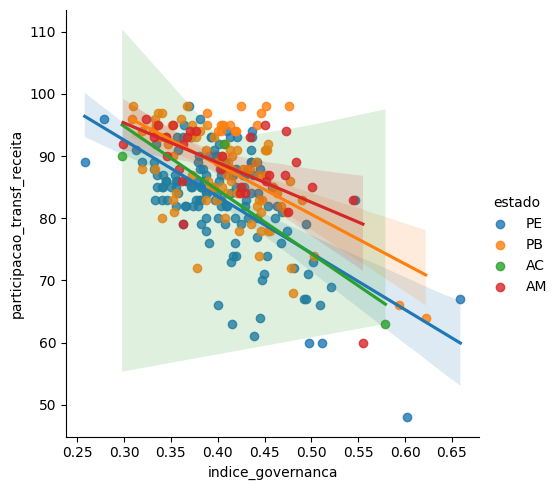

In [181]:
sns.lmplot(x="indice_governanca", y="participacao_transf_receita", data=dados[dados['estado'].isin(['AC','PB','PE','AM'])], hue="estado")
plt.show()

In [182]:
dados[dados["estado"] == "AC"][["participacao_transf_receita","indice_governanca"]]

,participacao_transf_receita,indice_governanca
642,63.00,0.58
2803,92.00,0.41
3297,90.00,0.30
3421,NaN,NaN
3576,NaN,NaN
3959,NaN,NaN
4278,86.00,NaN
4348,89.00,NaN
4349,89.00,NaN
4350,94.00,NaN


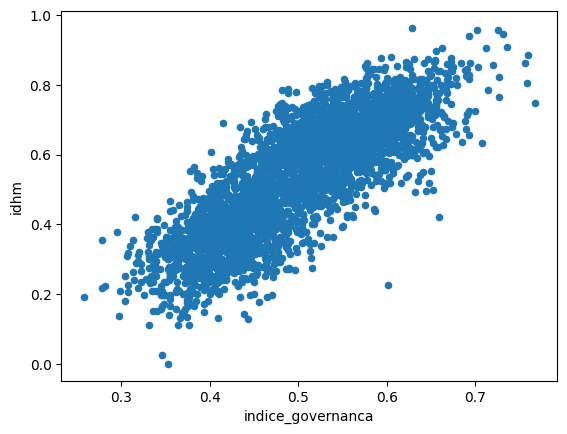

In [186]:
dados.plot(kind="scatter", x="indice_governanca", y="idhm")
plt.show()

<Axes: xlabel='estado'>

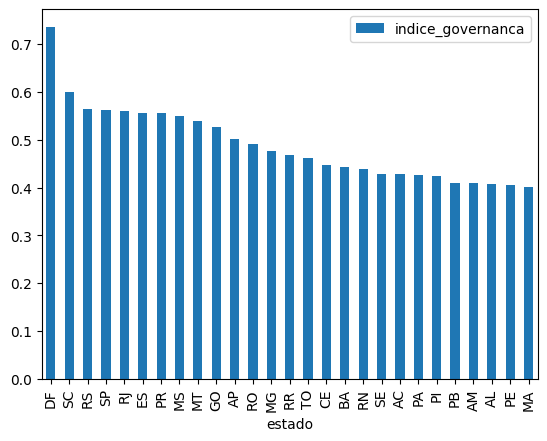

In [187]:
dados_ig_estado = dados.groupby("estado")['indice_governanca'].mean()
dados_ig_estado = dados_ig_estado.reset_index()
dados_ig_estado = dados_ig_estado.sort_values(by='indice_governanca', ascending=False)
dados_ig_estado.plot(kind='bar', x='estado', y='indice_governanca')

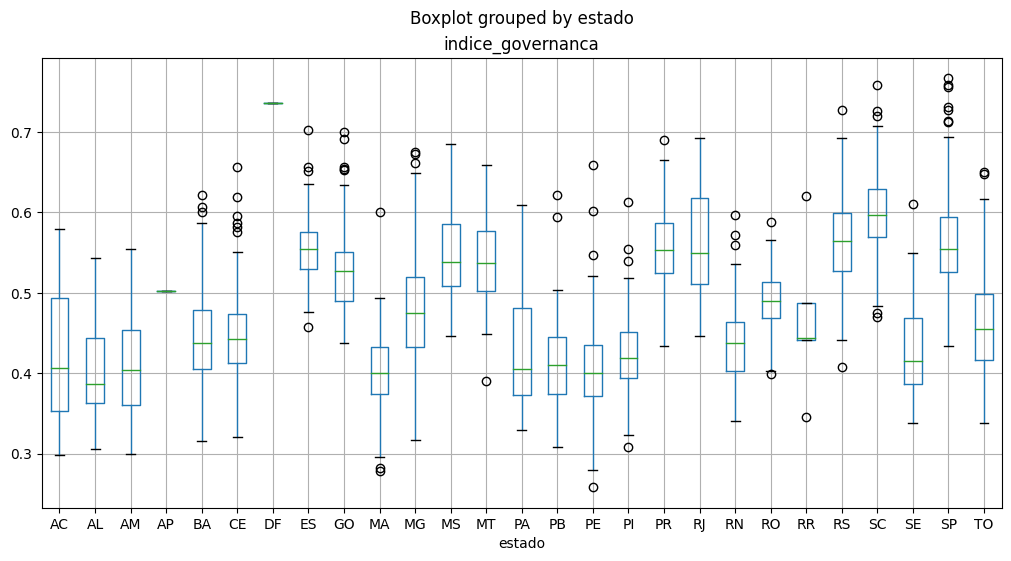

In [188]:
dados.boxplot(column="indice_governanca", by="estado", figsize=(12,6))
plt.show()

In [191]:
dados[dados['estado'] == 'DF']

,regiao,estado,municipio,codigo_mun,capital,porte,populacao,area,densidade_dem,pib,...,gasto_pc_educacao,exp_anos_estudo,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao,idhm,ranking_igm,indice_governanca
4,CENTRO-OESTE,DF,BRASILIA,5300108,1,Grande porte,2977216.00,5780.00,515.09,175362791.42,...,2077.49,9.87,493.51,551.98,538.37,509.21,567.99,0.91,5º,0.74


In [193]:
dados[dados['estado'] == 'AP']['indice_governanca']

1675   0.50
3532    NaN
3771    NaN
4164    NaN
4197    NaN
4213    NaN
4250    NaN
4261    NaN
4268    NaN
4279    NaN
4324    NaN
4326    NaN
4422    NaN
4423    NaN
4424    NaN
4425    NaN
Name: indice_governanca, dtype: float64